## Example: Forward Pass for a single layer

In [2]:
import numpy as np
import matplotlib as plt 

In [3]:
# Input: 3 samples, 4 features
X = np.array([[0.2, 0.5, 0.1, 0.9],
              [0.7, 0.3, 0.8, 0.2],
              [0.5, 0.5, 0.5, 0.5]])

In [4]:
# Weights: 4 input features → 3 neurons
W = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.4, 0.6],
              [0.3, 0.5, 0.7],
              [0.4, 0.6, 0.8]])

In [5]:
# Bias for 3 neurons
b = np.array([0.1, 0.2, 0.3])

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
# Forward Pass
Z = np.dot(X, W) + b
A = sigmoid(Z)  # Activation
print("Forward Pass Output (Activated):\n", A)

Forward Pass Output (Activated):
 [[0.6479408  0.7407749  0.81607827]
 [0.63413559 0.7407749  0.82491373]
 [0.64565631 0.75026011 0.83201839]]


In [16]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [18]:
#Backprop Example: Compute gradient w.r.t weights
# Assume dA from next layer
dA = np.ones_like(A)
dZ = dA * sigmoid_derivative(Z)
dW = np.dot(X.T, dZ) / X.shape[0]  # Gradient of weights
db = np.sum(dZ, axis=0) / X.shape[0]  # Gradient of bias
print("\nGradient w.r.t Weights:\n", dW)
print("\nGradient w.r.t Bias:\n", db)


Gradient w.r.t Weights:
 [[0.10747339 0.08883655 0.06700085]
 [0.09935039 0.08243563 0.06275283]
 [0.1076032  0.08883655 0.06681207]
 [0.12203194 0.10163838 0.07795106]]

Gradient w.r.t Bias:
 [0.22963513 0.19047493 0.14476313]


# Loss (cost) functions 

In [19]:
# ----------------------------
# Sample data
# ----------------------------
y_true = np.array([0, 1, 1, 0])
# We'll vary one prediction to see how loss changes
y_pred_values = np.linspace(0, 1, 100)

In [20]:
# ----------------------------
# Compute MAE and MSE for varying y_pred[0]
# ----------------------------
mae_list = []
mse_list = []
bce_list = []

In [21]:
for y_pred0 in y_pred_values:
    y_pred = np.array([y_pred0, 0.9, 0.8, 0.2])  # only change first prediction
    # MAE
    mae = np.mean(np.abs(y_true - y_pred))
    mae_list.append(mae)
    
    # MSE
    mse = np.mean((y_true - y_pred)**2)
    mse_list.append(mse)
    
    # Binary Cross-Entropy
    epsilon = 1e-15
    y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
    bce = -np.mean(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
    bce_list.append(bce)

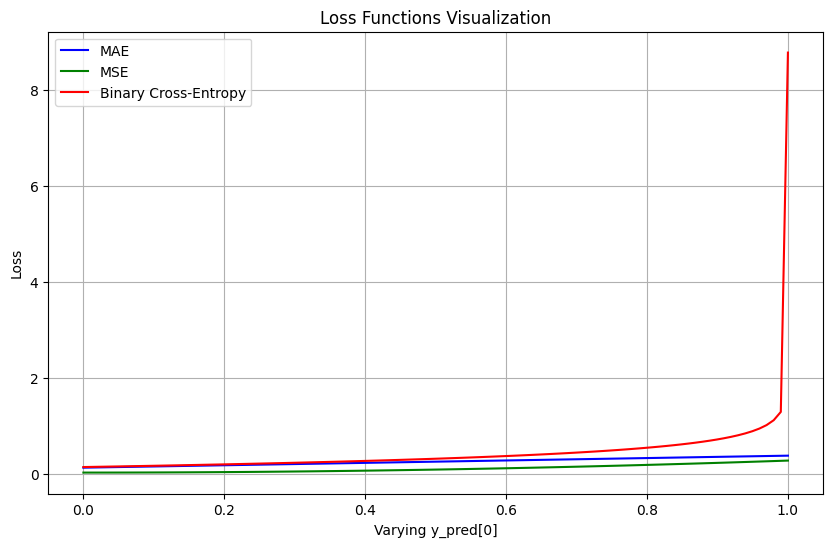

In [25]:
# ----------------------------
# Plot the losses
# ----------------------------
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_pred_values, mae_list, label='MAE', color='blue')
plt.plot(y_pred_values, mse_list, label='MSE', color='green')
plt.plot(y_pred_values, bce_list, label='Binary Cross-Entropy', color='red')
plt.xlabel('Varying y_pred[0]')
plt.ylabel('Loss')
plt.title('Loss Functions Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Gradient Descent for log loss

In [12]:
# implement gradient descent for log loss
# sample data 
y_true_gd = np.array([1, 0, 1, 0])
y_pred_gd = np.array([0.6, 0.4, 0.8, 0.3])
x_train = np.array([[0.5], [0.2], [0.9], [0.4]])
x_test = np.array([[0.3], [0.7]])
learning_rate = 0.1
# Number of iterations
iterations = 1000   

In [4]:
def segmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))

In [6]:
def gradient_descent_log_loss(x_train, y_true, y_pred, learning_rate, iterations):
    m = len(y_true)
    for i in range(iterations):
        # Compute gradient
        gradient = np.dot(x_train.T, (y_pred - y_true)) / m
        # Update predictions
        y_pred -= learning_rate * gradient
        # Optionally compute and print loss every 100 iterations
        if i % 100 == 0:
            loss = binary_cross_entropy(y_true, y_pred)
            print(f"Iteration {i}, Loss: {loss}")
    return y_pred

In [13]:
# the final predictions after gradient descent
final_predictions = gradient_descent_log_loss(x_train, y_true_gd, y_pred_gd, learning_rate, iterations)
print("Final Predictions after Gradient Descent:\n", final_predictions) 

Iteration 0, Loss: 0.4005915198206027
Iteration 100, Loss: 0.4136799092309622
Iteration 200, Loss: 0.41380882351884307
Iteration 300, Loss: 0.4138095886244572
Iteration 400, Loss: 0.41380959315435234
Iteration 500, Loss: 0.4138095931811718
Iteration 600, Loss: 0.4138095931813306
Iteration 700, Loss: 0.41380959318133265
Iteration 800, Loss: 0.41380959318133265
Iteration 900, Loss: 0.41380959318133265
Final Predictions after Gradient Descent:
 [0.69 0.49 0.89 0.39]
